# 🎯 Analyse Exploratoire des Données (EDA) - Credit Scoring


1. **Qualité des données** : Valeurs manquantes, outliers, cohérence
2. **Variables explicatives** : Quelles features sont les plus prédictives ?
3. **Corrélations** : Multicolinéarité et relations entre variables
4. **Déséquilibre des classes** : Distribution de la target
5. **Data Leakage** : Risques de fuite d'information
6. **Recommandations** : Préparation des données pour la modélisation




In [25]:

# Imports essentiels
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path

# Configuration pour des graphiques plus lisibles
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
warnings.filterwarnings('ignore')

# Configuration pandas pour affichage optimal
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

print("✅ Imports terminés avec succès")
print("📊 Configuration des graphiques appliquée")

✅ Imports terminés avec succès
📊 Configuration des graphiques appliquée


In [2]:
# Chargement du dataset
data_path = Path("../data/raw/credit_risk_dataset.csv")
df = pd.read_csv(data_path)

print(f"📁 Dataset chargé depuis : {data_path}")
print(f"📊 Dimensions : {df.shape[0]} lignes × {df.shape[1]} colonnes")
print(f"🔍 Premières lignes :")
print(df.head())

📁 Dataset chargé depuis : ..\data\raw\credit_risk_dataset.csv
📊 Dimensions : 32581 lignes × 12 colonnes
🔍 Premières lignes :
   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_

## 📊 Section 2: Vue d'Ensemble et Qualité des Données

### 🔍 Informations générales sur le dataset

In [3]:
# Informations générales sur le dataset
print("🔍 INFORMATIONS GÉNÉRALES")
print("=" * 50)

# Types de données et mémoire
print(f"💾 Utilisation mémoire : {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"📋 Types de données :")
print(df.dtypes.value_counts())

print("\n📊 Informations détaillées :")
print(df.info())

🔍 INFORMATIONS GÉNÉRALES
💾 Utilisation mémoire : 8.63 MB
📋 Types de données :
int64      5
object     4
float64    3
Name: count, dtype: int64

📊 Informations détaillées :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32

🔍 ANALYSE DES VALEURS MANQUANTES
                   Valeurs_manquantes  Pourcentage
loan_int_rate                    3116     9.563856
person_emp_length                 895     2.747000


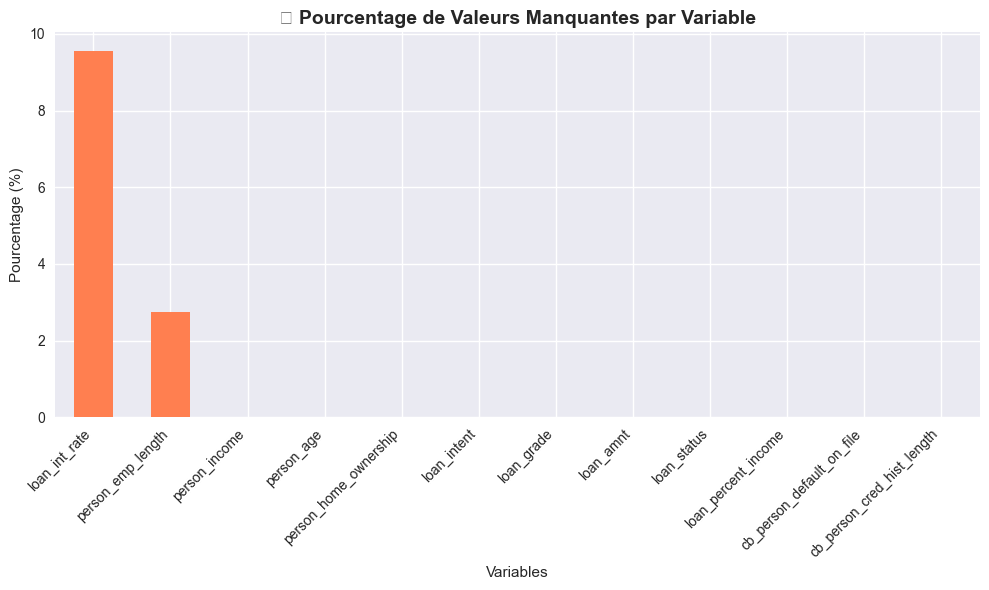

In [4]:
# Analyse des valeurs manquantes
print("🔍 ANALYSE DES VALEURS MANQUANTES")
print("=" * 50)

# Calcul des valeurs manquantes
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Valeurs_manquantes': missing_data,
    'Pourcentage': missing_percent
}).sort_values('Valeurs_manquantes', ascending=False)

print(missing_df[missing_df['Valeurs_manquantes'] > 0])

# Visualisation des valeurs manquantes
if missing_df['Valeurs_manquantes'].sum() > 0:
    plt.figure(figsize=(10, 6))
    missing_df['Pourcentage'].plot(kind='bar', color='coral')
    plt.title('📊 Pourcentage de Valeurs Manquantes par Variable', fontsize=14, fontweight='bold')
    plt.xlabel('Variables')
    plt.ylabel('Pourcentage (%)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("✅ Aucune valeur manquante détectée !")

In [5]:
# Analyse des doublons
print("🔍 ANALYSE DES DOUBLONS")
print("=" * 50)

duplicates = df.duplicated().sum()
print(f"📋 Nombre de lignes dupliquées : {duplicates}")
print(f"📊 Pourcentage de doublons : {(duplicates/len(df))*100:.2f}%")

if duplicates > 0:
    print("\n🔍 Exemples de doublons :")
    print(df[df.duplicated(keep=False)].head(10))
else:
    print("✅ Aucun doublon détecté !")

# Vérification des clés primaires potentielles
print(f"\n🔑 Vérification des clés primaires :")
for col in df.columns:
    unique_ratio = df[col].nunique() / len(df)
    print(f"   {col}: {unique_ratio:.4f} ({df[col].nunique()} valeurs uniques)")

🔍 ANALYSE DES DOUBLONS
📋 Nombre de lignes dupliquées : 165
📊 Pourcentage de doublons : 0.51%

🔍 Exemples de doublons :
      person_age  person_income person_home_ownership  person_emp_length  \
14            23         115000                  RENT                2.0   
238           22         183000              MORTGAGE                3.0   
252           24          85000                  RENT                5.0   
591           26          20000              MORTGAGE                5.0   
740           21          21600                   OWN                NaN   
817           22          22000                   OWN                1.0   
920           26          50000                  RENT               10.0   
1094          22          24449                   OWN                2.0   
1142          25          60000                  RENT                3.0   
1453          23          20400                  RENT                2.0   

            loan_intent loan_grade  loan_amn

### 📈 Ce qu'il faut retenir - Section 2

- **Qualité des données** : Évaluation de la complétude et cohérence
- **Valeurs manquantes** : Identification des variables à traiter
- **Doublons** : Vérification de l'unicité des observations
- **Types de données** : Compréhension de la structure du dataset

---

## 📊 Section 3: Analyse des Variables Numériques

### 🔢 Statistiques descriptives et distributions

In [6]:
# Identification des variables numériques
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"🔢 Variables numériques identifiées : {len(numeric_cols)}")
print(f"📋 Liste : {numeric_cols}")

# Statistiques descriptives
print("\n📊 STATISTIQUES DESCRIPTIVES")
print("=" * 50)
print(df[numeric_cols].describe())

# Vérification des valeurs aberrantes potentielles
print(f"\n🔍 VÉRIFICATION DES VALEURS ABERRANTES")
print("=" * 50)
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_percent = (len(outliers) / len(df)) * 100
    
    print(f"{col:25} : {len(outliers):>4} outliers ({outlier_percent:>5.2f}%)")

🔢 Variables numériques identifiées : 8
📋 Liste : ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length']

📊 STATISTIQUES DESCRIPTIVES
         person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11

📊 VISUALISATION DES DISTRIBUTIONS


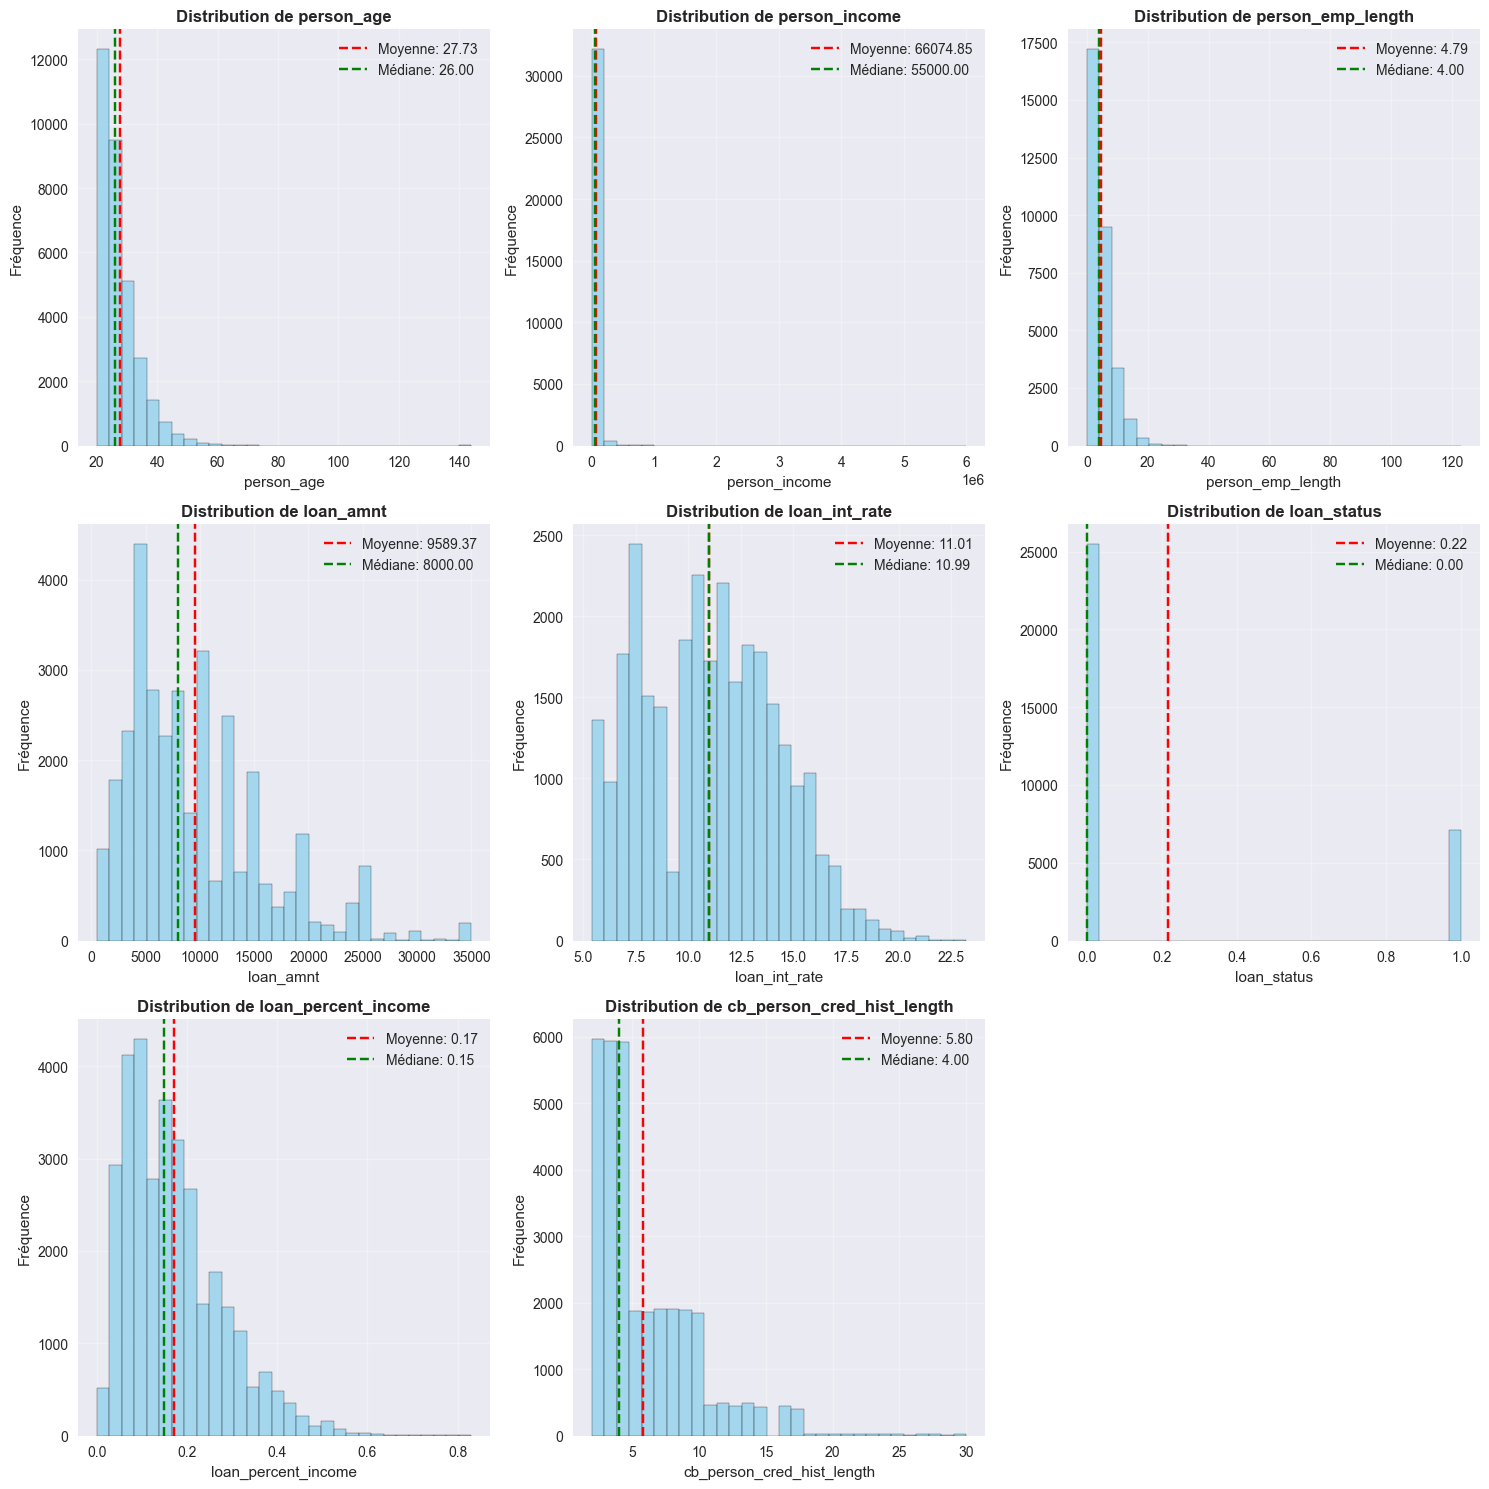

In [7]:
# Visualisation des distributions des variables numériques
print("📊 VISUALISATION DES DISTRIBUTIONS")
print("=" * 50)

# Création d'une grille de subplots
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

for i, col in enumerate(numeric_cols):
    if i < len(axes):
        # Histogramme avec courbe de densité
        axes[i].hist(df[col].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        axes[i].set_title(f'Distribution de {col}', fontsize=12, fontweight='bold')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Fréquence')
        
        # Ajout de statistiques sur le graphique
        mean_val = df[col].mean()
        median_val = df[col].median()
        axes[i].axvline(mean_val, color='red', linestyle='--', label=f'Moyenne: {mean_val:.2f}')
        axes[i].axvline(median_val, color='green', linestyle='--', label=f'Médiane: {median_val:.2f}')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)

# Masquer les subplots vides
for i in range(len(numeric_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

📦 BOXPLOTS - DÉTECTION VISUELLE DES OUTLIERS


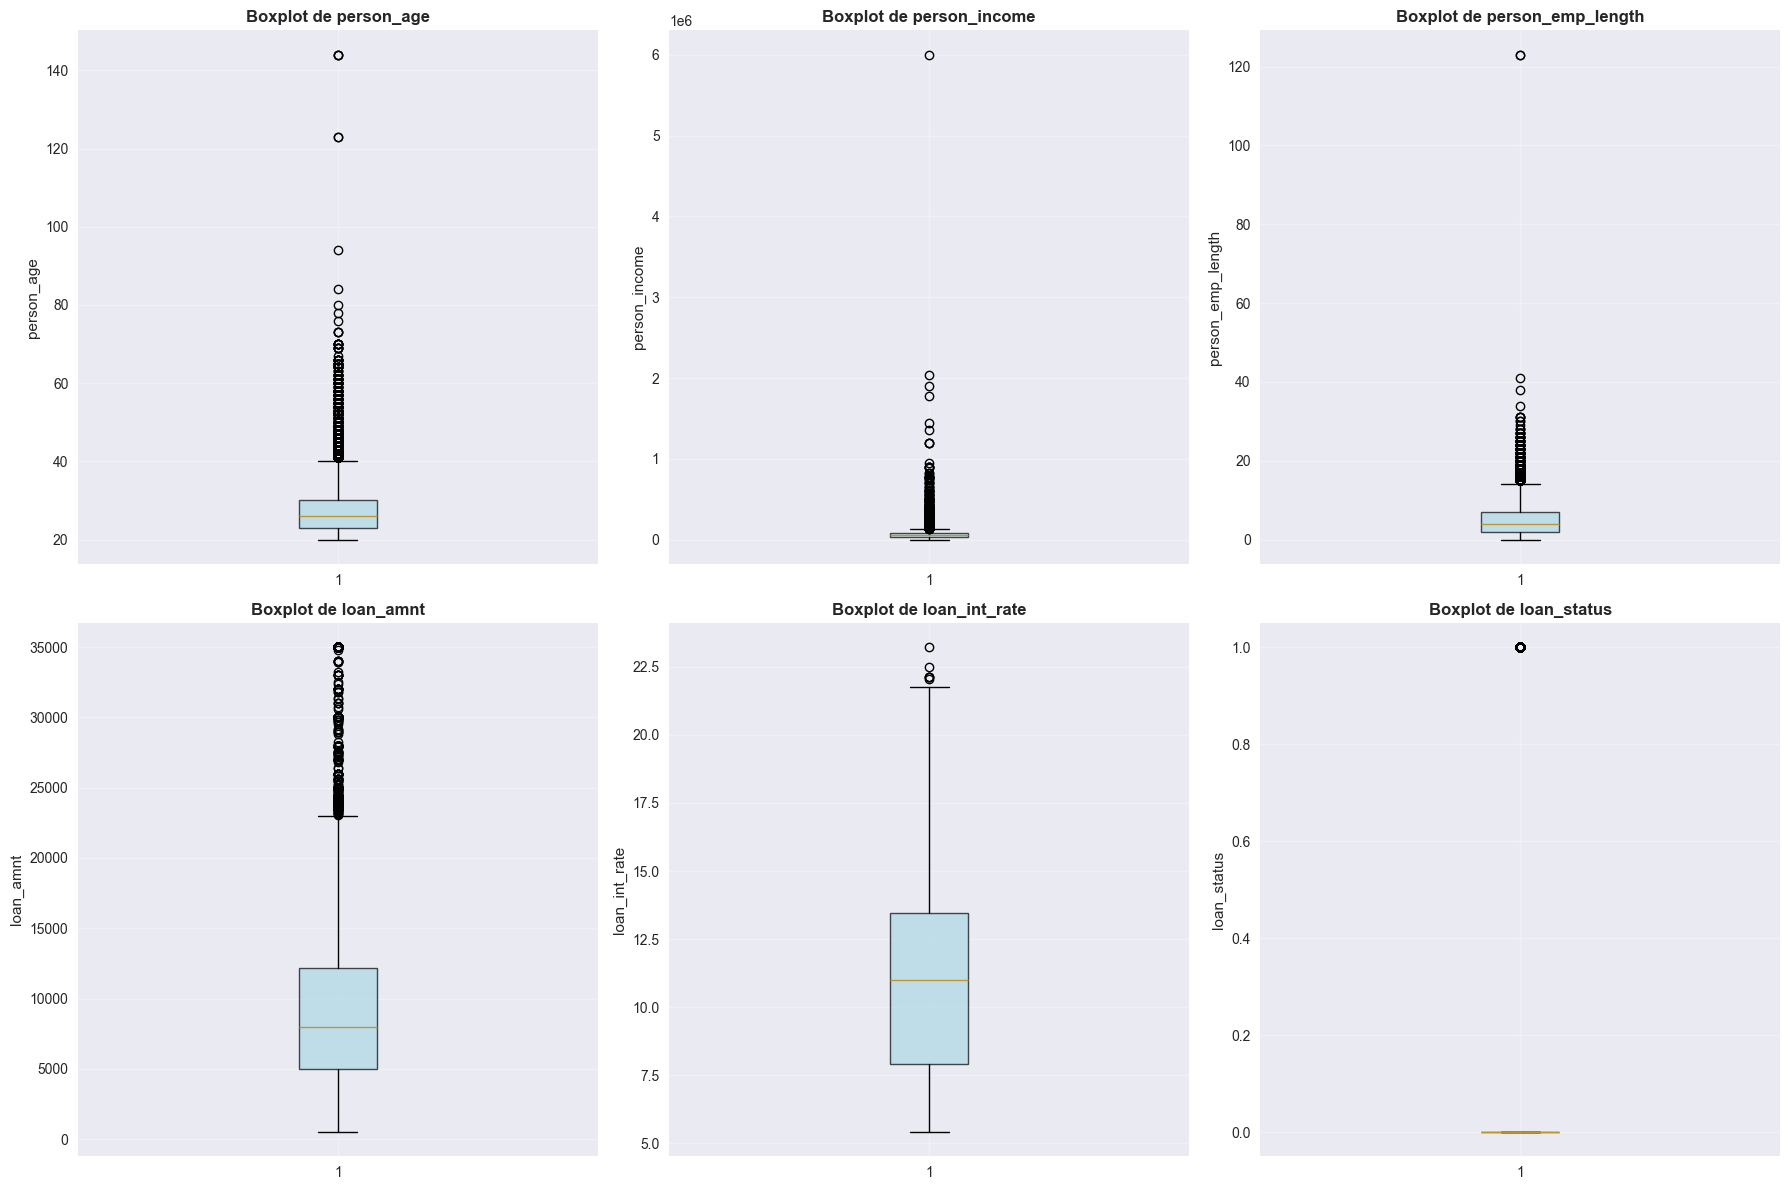


🔍 ANALYSE DES VALEURS EXTRÊMES

person_age:
  Min:      20.00
  Max:     144.00
  Range:     124.00

person_income:
  Min:    4000.00
  Max: 6000000.00
  Range: 5996000.00

person_emp_length:
  Min:       0.00
  Max:     123.00
  Range:     123.00

loan_amnt:
  Min:     500.00
  Max:   35000.00
  Range:   34500.00

loan_int_rate:
  Min:       5.42
  Max:      23.22
  Range:      17.80

loan_status:
  Min:       0.00
  Max:       1.00
  Range:       1.00

loan_percent_income:
  Min:       0.00
  Max:       0.83
  Range:       0.83

cb_person_cred_hist_length:
  Min:       2.00
  Max:      30.00
  Range:      28.00


In [8]:
# Boxplots pour identifier les outliers visuellement
print("📦 BOXPLOTS - DÉTECTION VISUELLE DES OUTLIERS")
print("=" * 50)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    if i < len(axes):
        # Boxplot
        axes[i].boxplot(df[col].dropna(), patch_artist=True, 
                       boxprops=dict(facecolor='lightblue', alpha=0.7))
        axes[i].set_title(f'Boxplot de {col}', fontsize=12, fontweight='bold')
        axes[i].set_ylabel(col)
        axes[i].grid(True, alpha=0.3)

# Masquer les subplots vides
for i in range(len(numeric_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Analyse des valeurs extrêmes pour chaque variable
print(f"\n🔍 ANALYSE DES VALEURS EXTRÊMES")
print("=" * 50)
for col in numeric_cols:
    print(f"\n{col}:")
    print(f"  Min: {df[col].min():>10.2f}")
    print(f"  Max: {df[col].max():>10.2f}")
    print(f"  Range: {df[col].max() - df[col].min():>10.2f}")

## 📊 Section 4: Analyse des Variables Catégorielles

### 🏷️ Distributions et cardinalité

In [9]:
# Identification des variables catégorielles
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"🏷️ Variables catégorielles identifiées : {len(categorical_cols)}")
print(f"📋 Liste : {categorical_cols}")

# Analyse de la cardinalité et des distributions
print(f"\n📊 ANALYSE DES VARIABLES CATÉGORIELLES")
print("=" * 50)

for col in categorical_cols:
    print(f"\n🔍 {col}:")
    print(f"  Cardinalité: {df[col].nunique()} valeurs uniques")
    print(f"  Valeurs manquantes: {df[col].isnull().sum()}")
    
    # Top 10 valeurs les plus fréquentes
    value_counts = df[col].value_counts()
    print(f"  Top 5 valeurs:")
    for val, count in value_counts.head().items():
        percentage = (count / len(df)) * 100
        print(f"    {val}: {count} ({percentage:.2f}%)")
    
    # Vérification des valeurs rares
    rare_values = value_counts[value_counts < 10]
    if len(rare_values) > 0:
        print(f"  ⚠️  Valeurs rares (< 10 occurrences): {len(rare_values)}")

🏷️ Variables catégorielles identifiées : 4
📋 Liste : ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

📊 ANALYSE DES VARIABLES CATÉGORIELLES

🔍 person_home_ownership:
  Cardinalité: 4 valeurs uniques
  Valeurs manquantes: 0
  Top 5 valeurs:
    RENT: 16446 (50.48%)
    MORTGAGE: 13444 (41.26%)
    OWN: 2584 (7.93%)
    OTHER: 107 (0.33%)

🔍 loan_intent:
  Cardinalité: 6 valeurs uniques
  Valeurs manquantes: 0
  Top 5 valeurs:
    EDUCATION: 6453 (19.81%)
    MEDICAL: 6071 (18.63%)
    VENTURE: 5719 (17.55%)
    PERSONAL: 5521 (16.95%)
    DEBTCONSOLIDATION: 5212 (16.00%)

🔍 loan_grade:
  Cardinalité: 7 valeurs uniques
  Valeurs manquantes: 0
  Top 5 valeurs:
    A: 10777 (33.08%)
    B: 10451 (32.08%)
    C: 6458 (19.82%)
    D: 3626 (11.13%)
    E: 964 (2.96%)

🔍 cb_person_default_on_file:
  Cardinalité: 2 valeurs uniques
  Valeurs manquantes: 0
  Top 5 valeurs:
    N: 26836 (82.37%)
    Y: 5745 (17.63%)


📊 VISUALISATION DES DISTRIBUTIONS CATÉGORIELLES


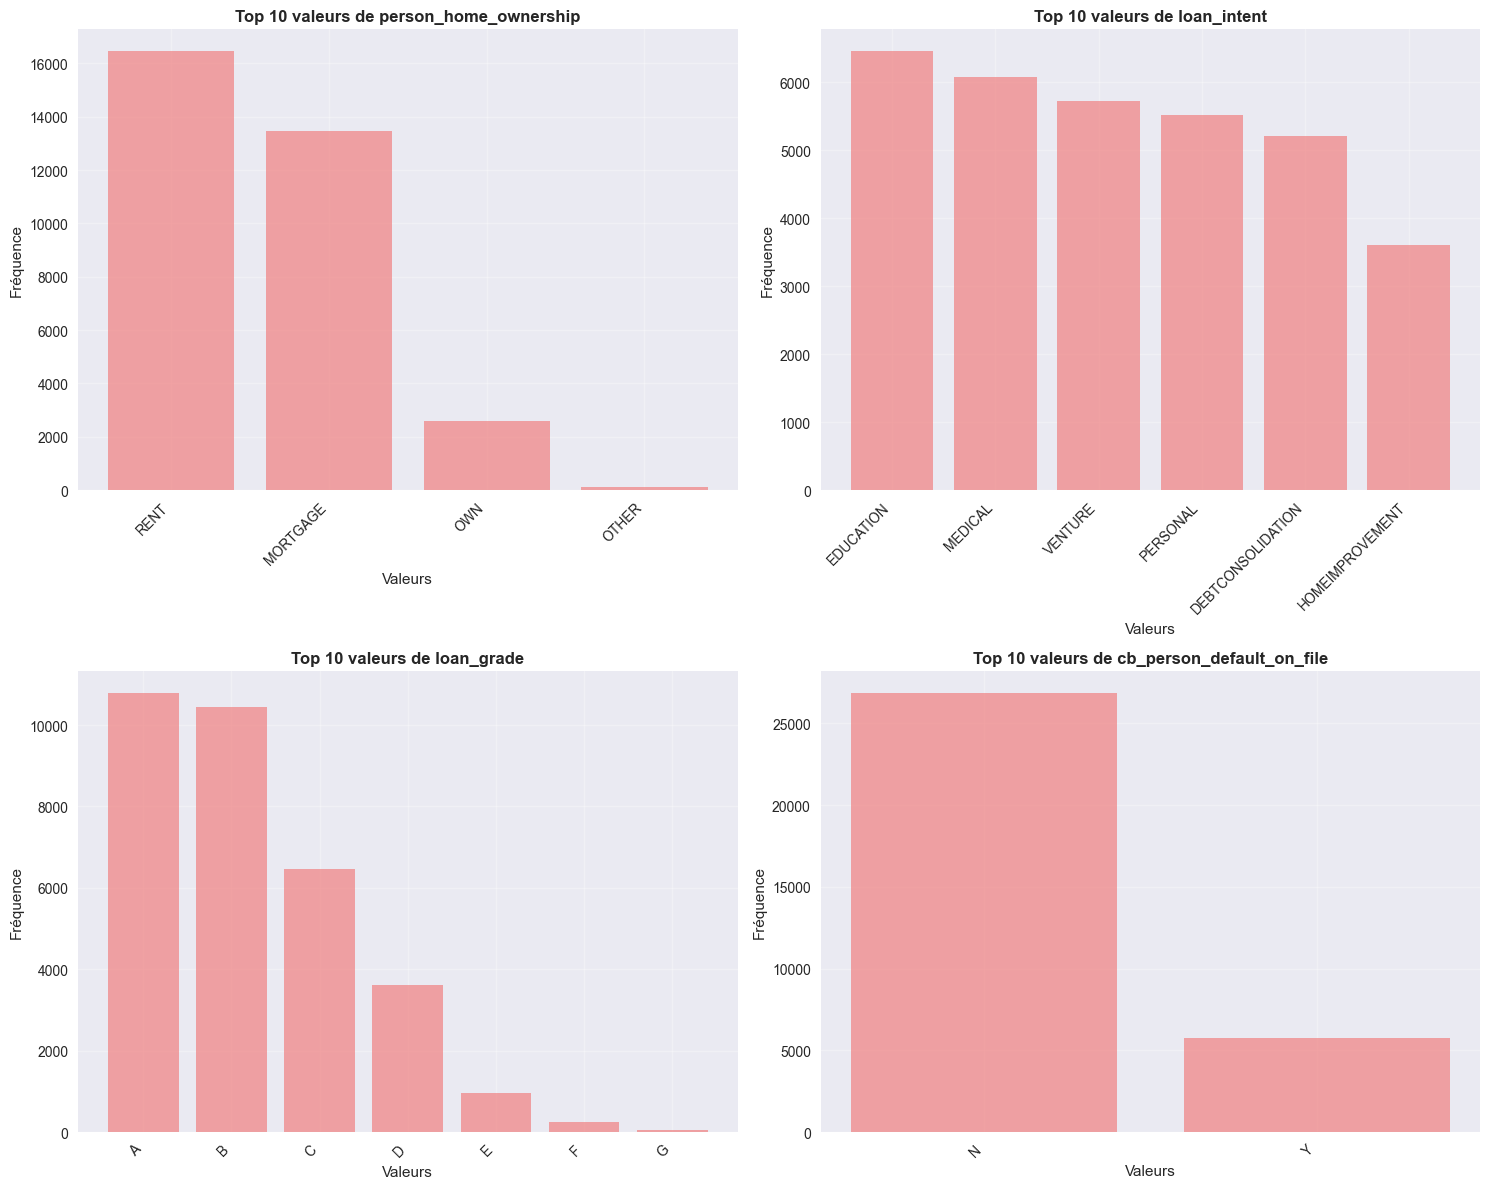

In [10]:
# Visualisation des distributions des variables catégorielles
print("📊 VISUALISATION DES DISTRIBUTIONS CATÉGORIELLES")
print("=" * 50)

# Création d'une grille de subplots
n_cols = 2
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 6*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

for i, col in enumerate(categorical_cols):
    if i < len(axes):
        # Barplot des top 10 valeurs
        top_values = df[col].value_counts().head(10)
        axes[i].bar(range(len(top_values)), top_values.values, color='lightcoral', alpha=0.7)
        axes[i].set_title(f'Top 10 valeurs de {col}', fontsize=12, fontweight='bold')
        axes[i].set_xlabel('Valeurs')
        axes[i].set_ylabel('Fréquence')
        axes[i].set_xticks(range(len(top_values)))
        axes[i].set_xticklabels(top_values.index, rotation=45, ha='right')
        axes[i].grid(True, alpha=0.3)

# Masquer les subplots vides
for i in range(len(categorical_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

## 📊 Section 5: Relations avec la Variable Cible

### 🎯 Analyse de l'impact des features sur la prédiction

🎯 ANALYSE DE LA VARIABLE CIBLE
🎯 Variable cible identifiée : loan_status

📊 Distribution de la variable cible :
  0: 25473 (78.18%)
  1: 7108 (21.82%)

⚖️  Déséquilibre des classes : 3.58:1
⚠️  ATTENTION : Déséquilibre significatif détecté !
   Recommandation : Utiliser des techniques de rééquilibrage (SMOTE, undersampling, etc.)


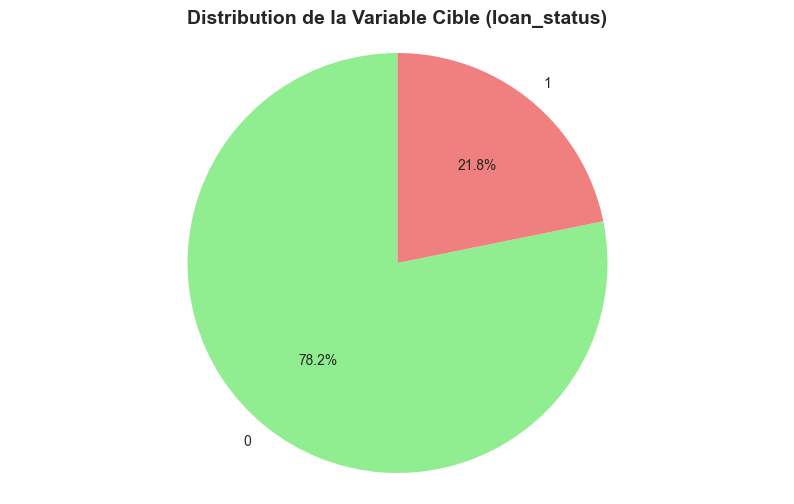

In [11]:
# Analyse de la variable cible
print("🎯 ANALYSE DE LA VARIABLE CIBLE")
print("=" * 50)

# Identification de la variable cible (loan_status)
target_col = 'loan_status'
print(f"🎯 Variable cible identifiée : {target_col}")

# Distribution de la variable cible
target_dist = df[target_col].value_counts()
target_percent = (target_dist / len(df)) * 100

print(f"\n📊 Distribution de la variable cible :")
for val, count in target_dist.items():
    print(f"  {val}: {count} ({target_percent[val]:.2f}%)")

# Vérification du déséquilibre des classes
class_imbalance = target_dist.max() / target_dist.min()
print(f"\n⚖️  Déséquilibre des classes : {class_imbalance:.2f}:1")

if class_imbalance > 2:
    print("⚠️  ATTENTION : Déséquilibre significatif détecté !")
    print("   Recommandation : Utiliser des techniques de rééquilibrage (SMOTE, undersampling, etc.)")

# Visualisation de la distribution
plt.figure(figsize=(10, 6))
colors = ['lightgreen', 'lightcoral']
plt.pie(target_dist.values, labels=target_dist.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title('Distribution de la Variable Cible (loan_status)', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()

📊 IMPACT DES VARIABLES NUMÉRIQUES SUR LA TARGET


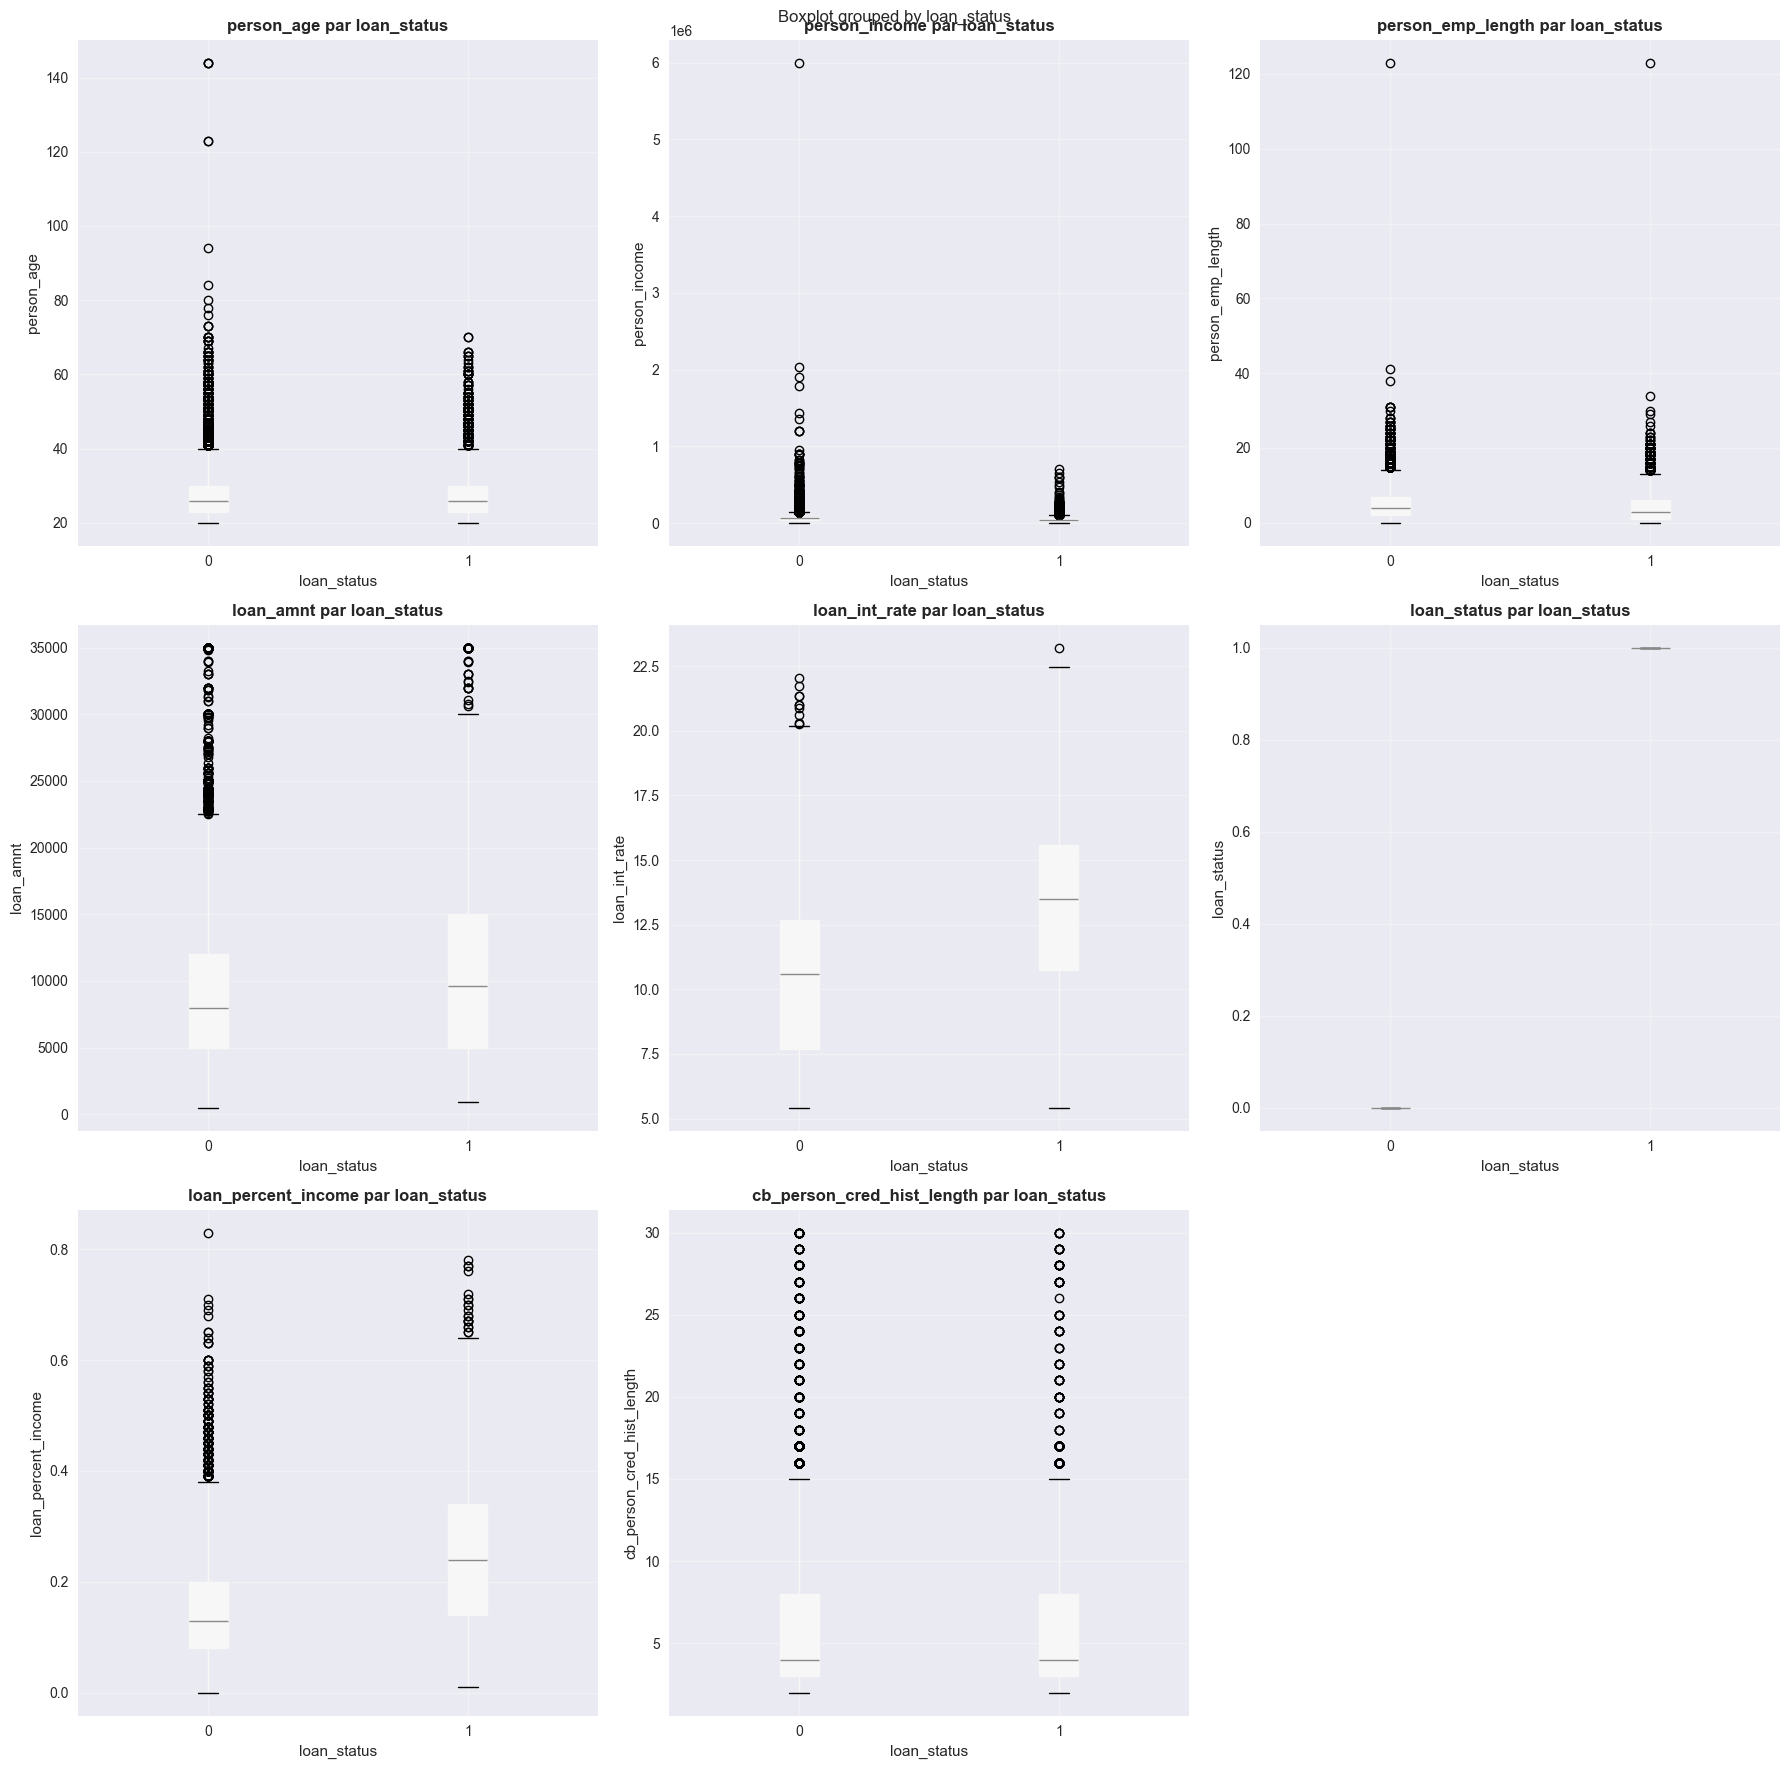


📈 STATISTIQUES PAR CLASSE DE LA TARGET

person_age:
                  mean       std  median
loan_status                             
0            27.807129  6.369669    26.0
1            27.474676  6.263642    26.0

person_income:
                     mean           std   median
loan_status                                     
0            70804.361559  66568.802606  60000.0
1            49125.652223  36907.376527  41498.0

person_emp_length:
                 mean       std  median
loan_status                            
0            4.968745  4.129022     4.0
1            4.137562  4.126956     3.0

loan_amnt:
                     mean          std  median
loan_status                                   
0             9237.464178  6026.375457  8000.0
1            10850.502954  7143.345344  9600.0

loan_int_rate:
                  mean       std  median
loan_status                             
0            10.435999  2.982190   10.59
1            13.060207  3.293167   13.49

loan_statu

In [12]:
# Analyse de l'impact des variables numériques sur la target
print("📊 IMPACT DES VARIABLES NUMÉRIQUES SUR LA TARGET")
print("=" * 50)

# Création d'une grille de subplots pour les boxplots par classe
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

for i, col in enumerate(numeric_cols):
    if i < len(axes):
        # Boxplot par classe de la target
        df.boxplot(column=col, by=target_col, ax=axes[i], patch_artist=True)
        axes[i].set_title(f'{col} par {target_col}', fontsize=12, fontweight='bold')
        axes[i].set_xlabel(target_col)
        axes[i].set_ylabel(col)
        axes[i].grid(True, alpha=0.3)

# Masquer les subplots vides
for i in range(len(numeric_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Calcul des statistiques par classe
print(f"\n📈 STATISTIQUES PAR CLASSE DE LA TARGET")
print("=" * 50)
for col in numeric_cols:
    print(f"\n{col}:")
    stats_by_class = df.groupby(target_col)[col].agg(['mean', 'std', 'median'])
    print(stats_by_class)

🏷️ IMPACT DES VARIABLES CATÉGORIELLES SUR LA TARGET


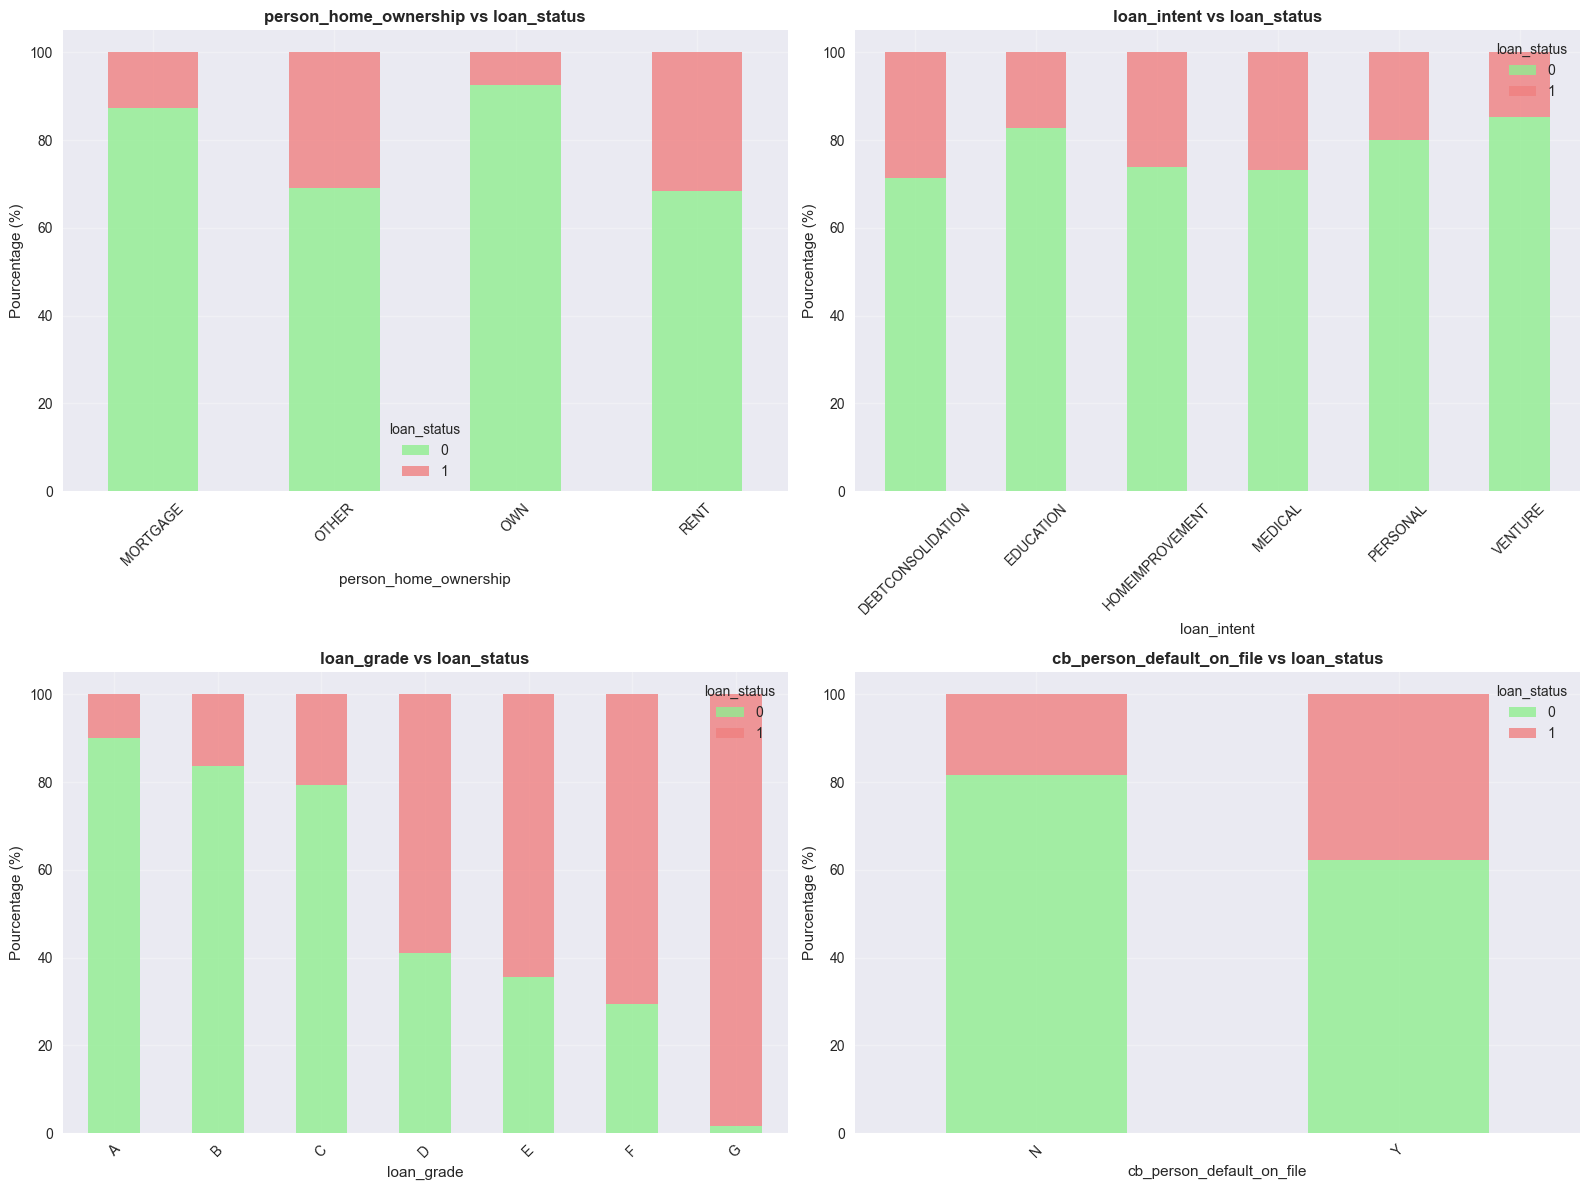


📊 POURCENTAGES PAR CLASSE DE LA TARGET

person_home_ownership:
loan_status                0      1
person_home_ownership              
MORTGAGE               87.43  12.57
OTHER                  69.16  30.84
OWN                    92.53   7.47
RENT                   68.43  31.57

loan_intent:
loan_status            0      1
loan_intent                    
DEBTCONSOLIDATION  71.41  28.59
EDUCATION          82.78  17.22
HOMEIMPROVEMENT    73.90  26.10
MEDICAL            73.30  26.70
PERSONAL           80.11  19.89
VENTURE            85.19  14.81

loan_grade:
loan_status      0      1
loan_grade               
A            90.04   9.96
B            83.72  16.28
C            79.27  20.73
D            40.95  59.05
E            35.58  64.42
F            29.46  70.54
G             1.56  98.44

cb_person_default_on_file:
loan_status                    0      1
cb_person_default_on_file              
N                          81.61  18.39
Y                          62.19  37.81


In [23]:
# Analyse de l'impact des variables catégorielles sur la target
print("🏷️ IMPACT DES VARIABLES CATÉGORIELLES SUR LA TARGET")
print("=" * 50)

# Création d'une grille de subplots pour les barplots par classe
n_cols = 2
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 6*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

for i, col in enumerate(categorical_cols):
    if i < len(axes):
        # Crosstab pour analyser la relation avec la target
        crosstab = pd.crosstab(df[col], df[target_col], normalize='index') * 100
        
        # Barplot empilé
        crosstab.plot(kind='bar', stacked=True, ax=axes[i], 
                     color=['lightgreen', 'lightcoral'], alpha=0.8)
        axes[i].set_title(f'{col} vs {target_col}', fontsize=12, fontweight='bold')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Pourcentage (%)')
        axes[i].legend(title=target_col)
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].grid(True, alpha=0.3)

# Masquer les subplots vides
for i in range(len(categorical_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Calcul des pourcentages par classe pour chaque variable catégorielle
print(f"\n📊 POURCENTAGES PAR CLASSE DE LA TARGET")
print("=" * 50)
for col in categorical_cols:
    print(f"\n{col}:")
    crosstab = pd.crosstab(df[col], df[target_col], normalize='index') * 100
    print(crosstab.round(2))

## 📊 Section 6: Analyse des Corrélations

### 🔗 Relations entre variables et multicolinéarité

🔗 ANALYSE DES CORRÉLATIONS


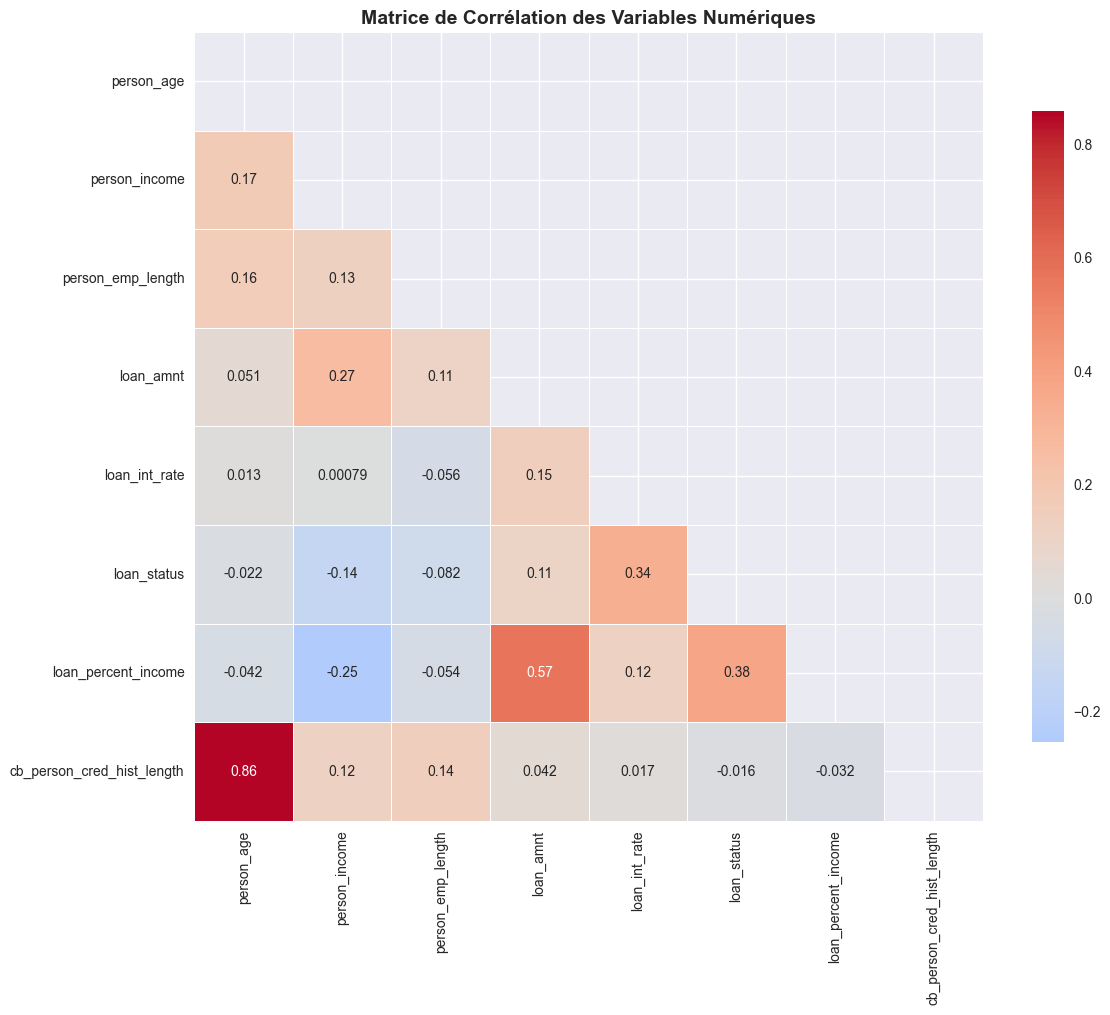


🔍 CORRÉLATIONS FORTES (|r| > 0.7)
  person_age ↔ cb_person_cred_hist_length: 0.859

⚠️  ATTENTION : Multicolinéarité détectée !
   Recommandation : Feature selection ou PCA


In [14]:
# Calcul de la matrice de corrélation
print("🔗 ANALYSE DES CORRÉLATIONS")
print("=" * 50)

# Matrice de corrélation pour les variables numériques
correlation_matrix = df[numeric_cols].corr()

# Visualisation de la matrice de corrélation
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Matrice de Corrélation des Variables Numériques', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Identification des corrélations fortes
print(f"\n🔍 CORRÉLATIONS FORTES (|r| > 0.7)")
print("=" * 50)
strong_correlations = []
for i in range(len(numeric_cols)):
    for j in range(i+1, len(numeric_cols)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            strong_correlations.append((numeric_cols[i], numeric_cols[j], corr_val))

if strong_correlations:
    for var1, var2, corr_val in strong_correlations:
        print(f"  {var1} ↔ {var2}: {corr_val:.3f}")
    print("\n⚠️  ATTENTION : Multicolinéarité détectée !")
    print("   Recommandation : Feature selection ou PCA")
else:
    print("✅ Aucune corrélation forte détectée")

🎯 CORRÉLATIONS AVEC LA VARIABLE CIBLE
📊 Corrélations avec loan_status (triées par importance):
  loan_percent_income      :    0.379
  loan_int_rate            :    0.335
  person_income            :   -0.144
  loan_amnt                :    0.105
  person_emp_length        :   -0.082
  person_age               :   -0.022
  cb_person_cred_hist_length:   -0.016


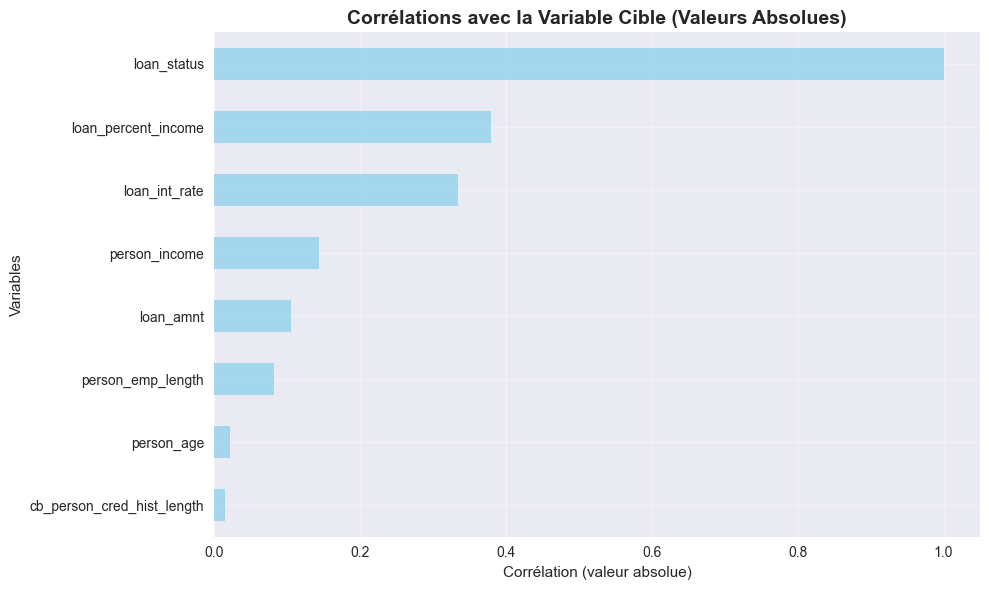


🏆 TOP 5 DES VARIABLES LES PLUS PRÉDICTIVES
  1. cb_person_cred_hist_length: 0.016
  2. person_age: 0.022
  3. person_emp_length: 0.082
  4. loan_amnt: 0.105
  5. person_income: 0.144


In [15]:
# Analyse des corrélations avec la variable cible
print("🎯 CORRÉLATIONS AVEC LA VARIABLE CIBLE")
print("=" * 50)

# Corrélations avec la target
target_correlations = correlation_matrix[target_col].sort_values(key=abs, ascending=False)
print("📊 Corrélations avec loan_status (triées par importance):")
for var, corr_val in target_correlations.items():
    if var != target_col:
        print(f"  {var:25}: {corr_val:>8.3f}")

# Visualisation des corrélations avec la target
plt.figure(figsize=(10, 6))
target_correlations_abs = target_correlations.abs().sort_values(ascending=True)
target_correlations_abs.plot(kind='barh', color='skyblue', alpha=0.7)
plt.title('Corrélations avec la Variable Cible (Valeurs Absolues)', fontsize=14, fontweight='bold')
plt.xlabel('Corrélation (valeur absolue)')
plt.ylabel('Variables')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Identification des variables les plus prédictives
print(f"\n🏆 TOP 5 DES VARIABLES LES PLUS PRÉDICTIVES")
print("=" * 50)
top_predictors = target_correlations_abs.head(5)
for i, (var, corr_val) in enumerate(top_predictors.items(), 1):
    print(f"  {i}. {var}: {corr_val:.3f}")

## 📊 Section 7: Détection d'Outliers et Valeurs Abnormales

### 🔍 Identification des observations atypiques

🔍 DÉTECTION AVANCÉE DES OUTLIERS
📊 Résumé des outliers par variable :

person_age:
  Nombre d'outliers: 1494 (4.59%)
  Bornes: [12.50, 40.50]

person_income:
  Nombre d'outliers: 1484 (4.55%)
  Bornes: [-22550.00, 140250.00]

person_emp_length:
  Nombre d'outliers: 853 (2.62%)
  Bornes: [-5.50, 14.50]

loan_amnt:
  Nombre d'outliers: 1689 (5.18%)
  Bornes: [-5800.00, 23000.00]

loan_int_rate:
  Nombre d'outliers: 6 (0.02%)
  Bornes: [-0.46, 21.83]

loan_status:
  Nombre d'outliers: 7108 (21.82%)
  Bornes: [0.00, 0.00]

loan_percent_income:
  Nombre d'outliers: 651 (2.00%)
  Bornes: [-0.12, 0.44]

cb_person_cred_hist_length:
  Nombre d'outliers: 1142 (3.51%)
  Bornes: [-4.50, 15.50]


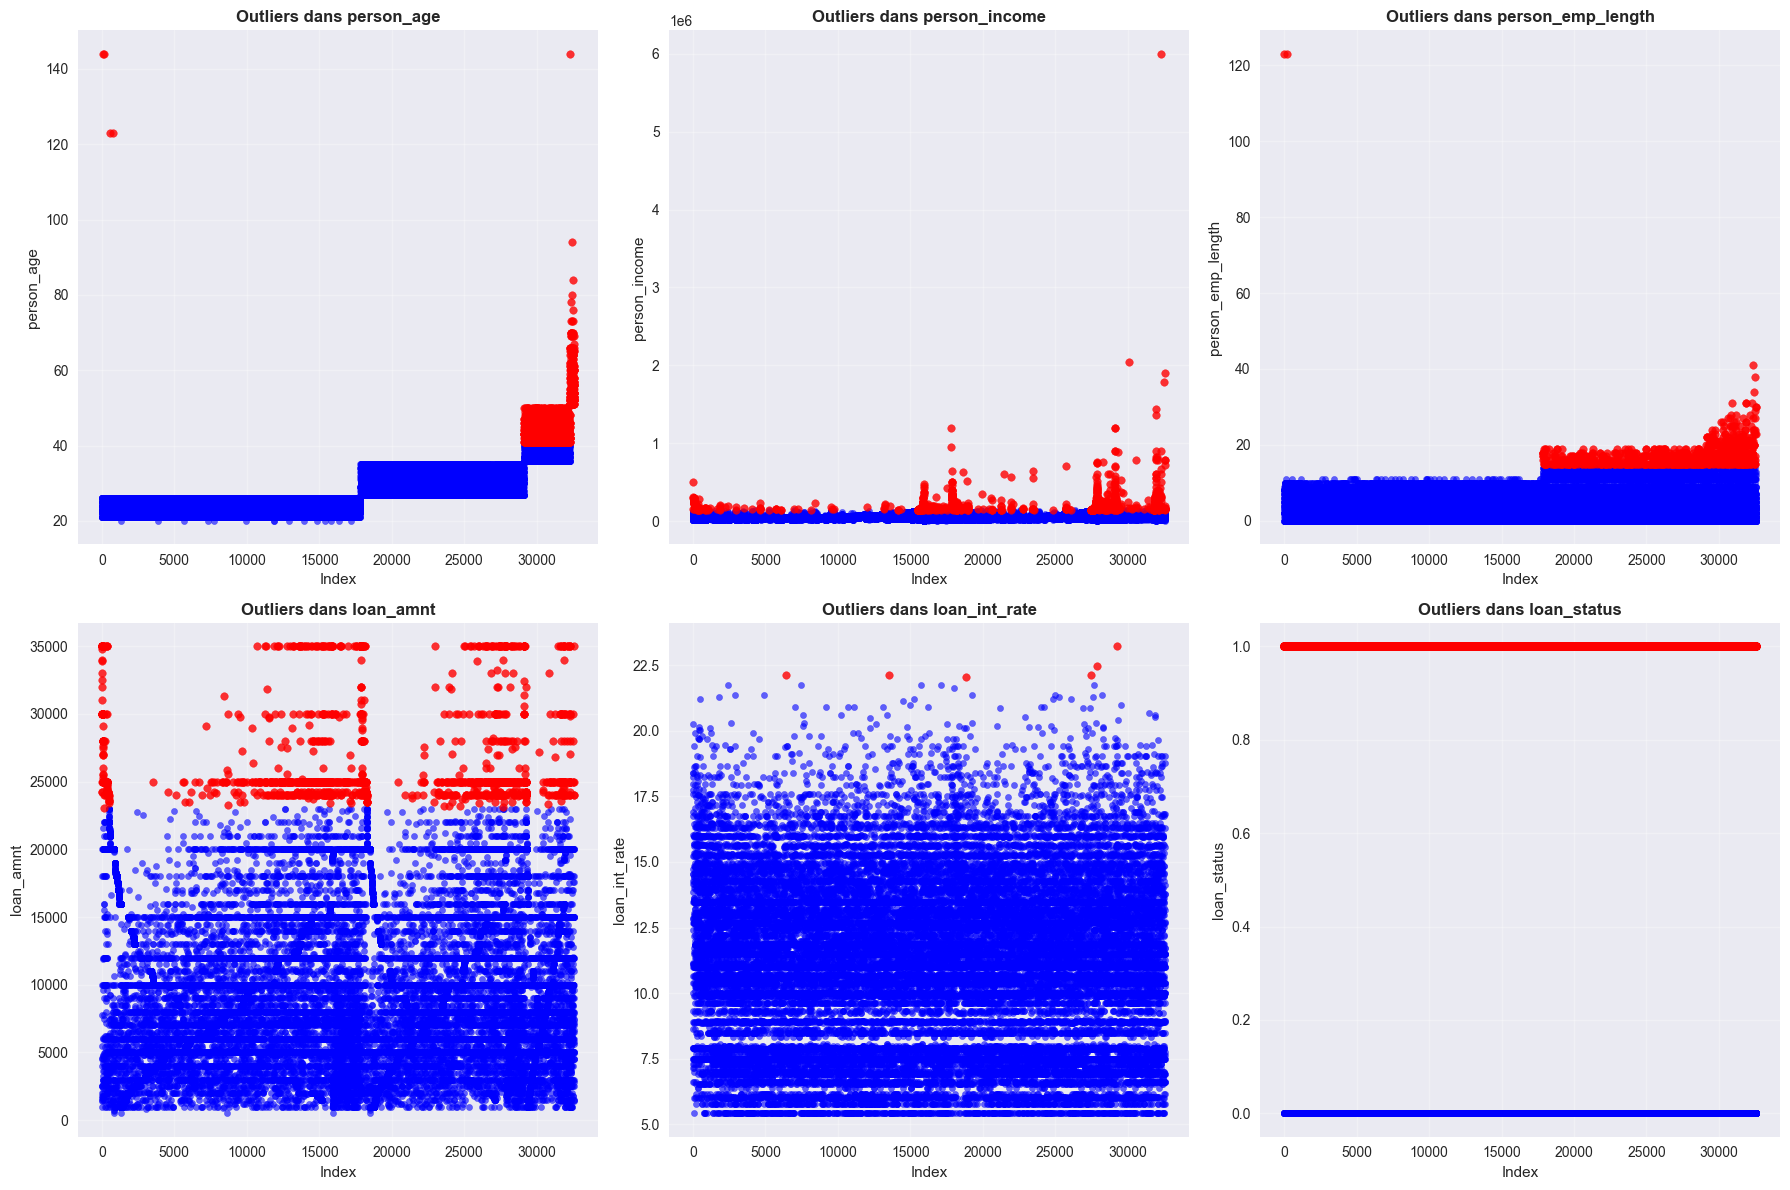

In [17]:
# Détection avancée des outliers
print("🔍 DÉTECTION AVANCÉE DES OUTLIERS")
print("=" * 50)

# Méthode IQR pour chaque variable numérique
outlier_summary = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_percent = (len(outliers) / len(df)) * 100
    
    outlier_summary[col] = {
        'count': len(outliers),
        'percent': outlier_percent,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }

# Affichage du résumé des outliers
print("📊 Résumé des outliers par variable :")
for col, stats in outlier_summary.items():
    print(f"\n{col}:")
    print(f"  Nombre d'outliers: {stats['count']} ({stats['percent']:.2f}%)")
    print(f"  Bornes: [{stats['lower_bound']:.2f}, {stats['upper_bound']:.2f}]")

# Visualisation des outliers avec des scatter plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    if i < len(axes):
        # Scatter plot avec outliers en rouge
        normal_data = df[~((df[col] < outlier_summary[col]['lower_bound']) | 
                           (df[col] > outlier_summary[col]['upper_bound']))]
        outlier_data = df[((df[col] < outlier_summary[col]['lower_bound']) | 
                           (df[col] > outlier_summary[col]['upper_bound']))]
        
        axes[i].scatter(normal_data.index, normal_data[col], alpha=0.6, color='blue', s=20)
        axes[i].scatter(outlier_data.index, outlier_data[col], alpha=0.8, color='red', s=30)
        axes[i].set_title(f'Outliers dans {col}', fontsize=12, fontweight='bold')
        axes[i].set_xlabel('Index')
        axes[i].set_ylabel(col)
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [24]:
# Analyse des valeurs aberrantes dans les variables catégorielles
print("🏷️ VALEURS ABERRANTES DANS LES VARIABLES CATÉGORIELLES")
print("=" * 50)

# Détection des valeurs rares dans les variables catégorielles
rare_values_summary = {}
for col in categorical_cols:
    value_counts = df[col].value_counts()
    rare_threshold = len(df) * 0.01  # 1% du dataset
    
    rare_values = value_counts[value_counts < rare_threshold]
    rare_values_summary[col] = {
        'count': len(rare_values),
        'values': rare_values.to_dict(),
        'total_rare_occurrences': rare_values.sum()
    }

# Affichage du résumé des valeurs rares
print("📊 Valeurs rares par variable catégorielle (< 1% du dataset):")
for col, stats in rare_values_summary.items():
    if stats['count'] > 0:
        print(f"\n{col}:")
        print(f"  Nombre de valeurs rares: {stats['count']}")
        print(f"  Total d'occurrences rares: {stats['total_rare_occurrences']}")
        for val, count in stats['values'].items():
            print(f"    '{val}': {count} occurrences")
    else:
        print(f"\n{col}: ✅ Aucune valeur rare détectée")

# Vérification des incohérences logiques
print(f"\n🔍 VÉRIFICATION DES INCOHÉRENCES LOGIQUES")
print("=" * 50)

# Exemple : vérification de l'âge vs statut d'emploi
print("Vérification âge vs longueur d'emploi:")
age_emp_issues = df[df['person_age'] < df['person_emp_length']]
if len(age_emp_issues) > 0:
    print(f"⚠️  {len(age_emp_issues)} cas où l'âge < longueur d'emploi")
    print("   Exemples:")
    print(age_emp_issues[['person_age', 'person_emp_length']].head())
else:
    print("✅ Aucune incohérence détectée")

🏷️ VALEURS ABERRANTES DANS LES VARIABLES CATÉGORIELLES
📊 Valeurs rares par variable catégorielle (< 1% du dataset):

person_home_ownership:
  Nombre de valeurs rares: 1
  Total d'occurrences rares: 107
    'OTHER': 107 occurrences

loan_intent: ✅ Aucune valeur rare détectée

loan_grade:
  Nombre de valeurs rares: 2
  Total d'occurrences rares: 305
    'F': 241 occurrences
    'G': 64 occurrences

cb_person_default_on_file: ✅ Aucune valeur rare détectée

🔍 VÉRIFICATION DES INCOHÉRENCES LOGIQUES
Vérification âge vs longueur d'emploi:
⚠️  2 cas où l'âge < longueur d'emploi
   Exemples:
     person_age  person_emp_length
0            22              123.0
210          21              123.0
